In [243]:
%matplotlib inline
%reset
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [244]:
teresina_df = pd.read_csv('teresina.csv')
picos_df = pd.read_csv('picos.csv')
floriano_df = pd.read_csv('floriano.csv')
oeiras_df = pd.read_csv('oeiras.csv')
srn_df = pd.read_csv('srn.csv')

In [245]:
def to_date(value):
    return datetime.strptime(value, '%d/%m/%y')

teresina_df['data'] = teresina_df['data'].apply(to_date)
picos_df['data'] = picos_df['data'].apply(to_date)
floriano_df['data'] = floriano_df['data'].apply(to_date)
oeiras_df['data'] = oeiras_df['data'].apply(to_date)
srn_df['data'] = srn_df['data'].apply(to_date)

In [246]:
teresina_df_date_index = teresina_df.drop(['novos_testes', 'casos_acumulados', 'obitos_acumulados'], axis=1)
teresina_df_date_index.set_index(["data"], inplace=True)

picos_df_date_index = picos_df.drop(['novos_testes', 'casos_acumulados', 'obitos_acumulados'], axis=1)
picos_df_date_index.set_index(["data"], inplace=True)

floriano_df_date_index = floriano_df.drop(['novos_testes', 'casos_acumulados', 'obitos_acumulados'], axis=1)
floriano_df_date_index.set_index(["data"], inplace=True)

oeiras_df_date_index = oeiras_df.drop(['novos_testes', 'casos_acumulados', 'obitos_acumulados'], axis=1)
oeiras_df_date_index.set_index(["data"], inplace=True)

srn_df_date_index = srn_df.drop(['novos_testes', 'casos_acumulados', 'obitos_acumulados'], axis=1)
srn_df_date_index.set_index(["data"], inplace=True)

In [247]:
teresina_df_date_index.head()

,novos_casos,novos_obitos
data,,
2020-03-19,3,0
2020-03-20,1,0
2020-03-21,0,0
2020-03-22,2,0
2020-03-23,1,0


In [248]:
picos_df_date_index.head()

,novos_casos,novos_obitos
data,,
2020-04-15,1,0
2020-04-16,0,0
2020-04-17,0,0
2020-04-18,1,0
2020-04-19,0,1


In [249]:
floriano_df_date_index.head()

,novos_casos,novos_obitos
data,,
2020-04-19,1,0
2020-04-20,1,0
2020-04-21,0,0
2020-04-22,2,0
2020-04-23,0,0


In [250]:
oeiras_df_date_index.head()

,novos_casos,novos_obitos
data,,
2020-04-24,3,0
2020-04-25,1,0
2020-04-26,1,0
2020-04-27,3,0
2020-04-28,1,0


In [251]:
srn_df_date_index.head()

,novos_casos,novos_obitos
data,,
2020-04-16,1,0
2020-04-17,0,0
2020-04-18,0,0
2020-04-19,0,0
2020-04-20,4,0


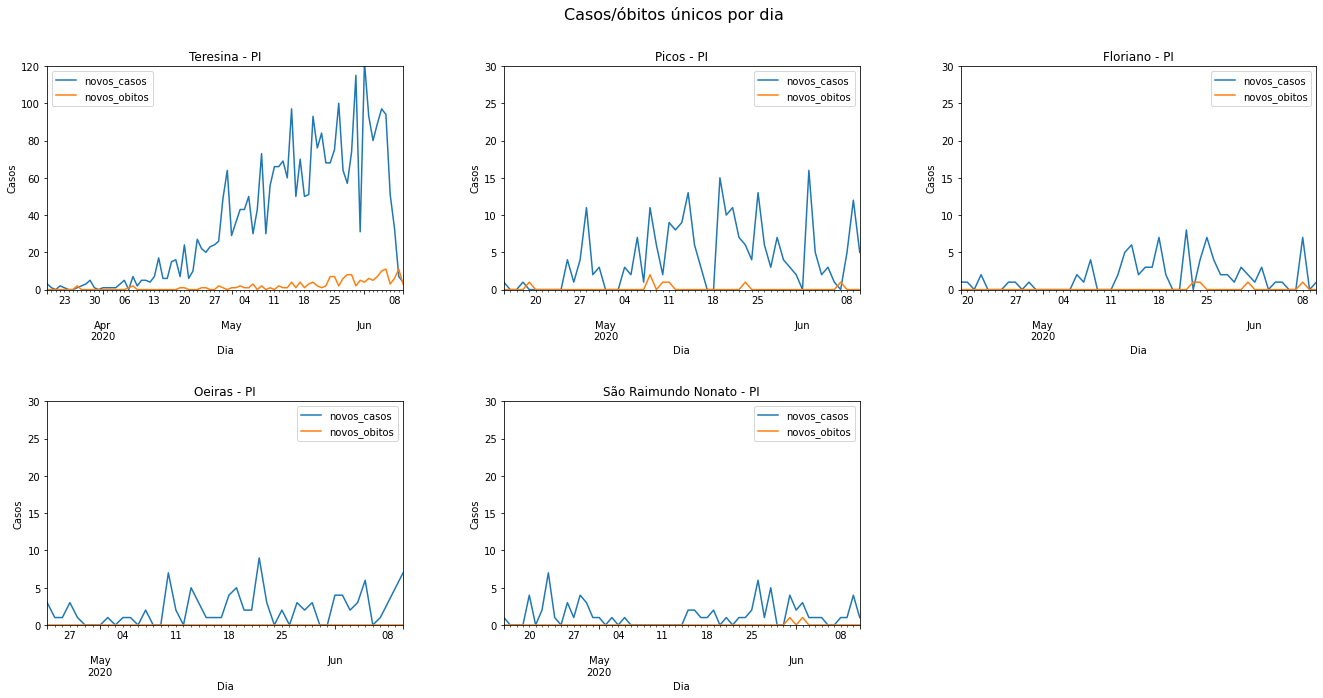

In [252]:
fig, ax = plt.subplots(2,3, figsize=(20,10))
fig.delaxes(ax[1][2])
fig.suptitle('Casos/óbitos únicos por dia', fontsize=16)
fig.tight_layout(pad=7.0)

plot_teresina = teresina_df_date_index.plot(kind='line', ax=ax[0,0], ylim=(0,120))
plot_teresina.set_title("Teresina - PI")
plot_teresina.set_xlabel("Dia")
plot_teresina.set_ylabel("Casos")

plot_picos = picos_df_date_index.plot(kind='line', ax=ax[0,1], ylim=(0,30))
plot_picos.set_title("Picos - PI")
plot_picos.set_xlabel("Dia")
plot_picos.set_ylabel("Casos")

plot_floriano = floriano_df_date_index.plot(kind='line', ax=ax[0,2], ylim=(0,30))
plot_floriano.set_title("Floriano - PI")
plot_floriano.set_xlabel("Dia")
plot_floriano.set_ylabel("Casos")

plot_oeiras = oeiras_df_date_index.plot(kind='line', ax=ax[1,0], ylim=(0,30))
plot_oeiras.set_title("Oeiras - PI")
plot_oeiras.set_xlabel("Dia")
plot_oeiras.set_ylabel("Casos")

plot_srn = srn_df_date_index.plot(kind='line', ax=ax[1,1], ylim=(0,30))
plot_srn.set_title("São Raimundo Nonato - PI")
plot_srn.set_xlabel("Dia")
plot_srn.set_ylabel("Casos")

plt.subplots_adjust(hspace=0.50)
plt.show()

In [253]:
def define_trend(dataframe, column):
    coefficients, residuals, _, _, _ = np.polyfit(range(len(dataframe.index)),column,1,full=True)
    mse = residuals[0]/(len(dataframe.index))
    nrmse = np.sqrt(mse)/(column.max() - column.min())
    return [coefficients[0]*x + coefficients[1] for x in range(len(column))]

Slope 1.1216158752657686
NRMSE: 0.1659136997761004
Slope 0.096577651024112
NRMSE: 0.25472050583150835
Slope 0.0374939525882922
NRMSE: 0.2577341563512894
Slope 0.05373425966131131
NRMSE: 0.22456416873171936
Slope 0.004861291158931811
NRMSE: 0.2298563723812527


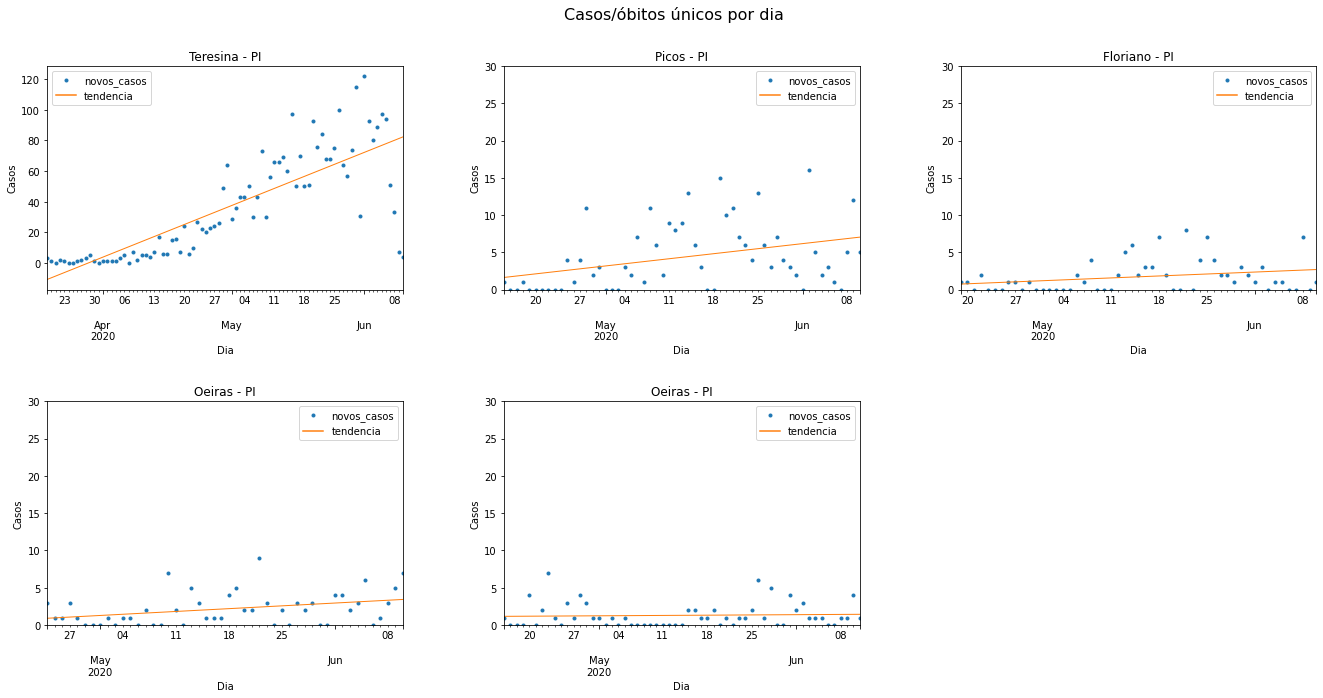

In [263]:
import numpy as np

lws = [0.0, 1.0]

fig, ax = plt.subplots(2,3, figsize=(20,10))
fig.delaxes(ax[1][2])
fig.suptitle('Casos/óbitos únicos por dia', fontsize=16)
fig.tight_layout(pad=7.0)

teresina_df_sem_obitos = teresina_df_date_index.loc[:,['novos_casos']]
teresina_df_sem_obitos['tendencia'] = define_trend(teresina_df_sem_obitos, teresina_df_sem_obitos['novos_casos'])
plot_teresina = teresina_df_sem_obitos.plot(kind='line',ax=ax[0,0], style=['.', None])

for i, l in enumerate(plot_teresina.lines):
    plt.setp(l, linewidth=lws[i])
plot_teresina.set_title("Teresina - PI")
plot_teresina.set_xlabel("Dia")
plot_teresina.set_ylabel("Casos")

picos_df_sem_obitos = picos_df_date_index.loc[:,['novos_casos']]
picos_df_sem_obitos['tendencia'] = define_trend(picos_df_sem_obitos, picos_df_sem_obitos['novos_casos'])
plot_picos = picos_df_sem_obitos.plot(kind='line',ax=ax[0,1], style=['.', None], ylim=(0,30))

for i, l in enumerate(plot_picos.lines):
    plt.setp(l, linewidth=lws[i])
plot_picos.set_title("Picos - PI")
plot_picos.set_xlabel("Dia")
plot_picos.set_ylabel("Casos")

floriano_df_sem_obitos = floriano_df_date_index.loc[:,['novos_casos']]
floriano_df_sem_obitos['tendencia'] = define_trend(floriano_df_sem_obitos, floriano_df_sem_obitos['novos_casos'])
plot_floriano = floriano_df_sem_obitos.plot(kind='line',ax=ax[0,2], style=['.', None], ylim=(0,30))

for i, l in enumerate(plot_floriano.lines):
    plt.setp(l, linewidth=lws[i])
plot_floriano.set_title("Floriano - PI")
plot_floriano.set_xlabel("Dia")
plot_floriano.set_ylabel("Casos")

oeiras_df_sem_obitos = oeiras_df_date_index.loc[:,['novos_casos']]
oeiras_df_sem_obitos['tendencia'] = define_trend(oeiras_df_sem_obitos, oeiras_df_sem_obitos['novos_casos'])
plot_oeiras = oeiras_df_sem_obitos.plot(kind='line',ax=ax[1,0], style=['.', None], ylim=(0,30))

for i, l in enumerate(plot_oeiras.lines):
    plt.setp(l, linewidth=lws[i])
plot_oeiras.set_title("Oeiras - PI")
plot_oeiras.set_xlabel("Dia")
plot_oeiras.set_ylabel("Casos")

srn_df_sem_obitos = srn_df_date_index.loc[:,['novos_casos']]
srn_df_sem_obitos['tendencia'] = define_trend(srn_df_sem_obitos, srn_df_sem_obitos['novos_casos'])
plot_srn = srn_df_sem_obitos.plot(kind='line',ax=ax[1,1], style=['.', None], ylim=(0,30))

for i, l in enumerate(plot_srn.lines):
    plt.setp(l, linewidth=lws[i])
plot_srn.set_title("Oeiras - PI")
plot_srn.set_xlabel("Dia")
plot_srn.set_ylabel("Casos")

plt.subplots_adjust(hspace=0.50)
plt.show()

In [ ]:
fig, ax = plt.subplots(2,3, figsize=(20,10))
fig.delaxes(ax[1][2])
fig.suptitle('Casos/óbitos cumulativos por dia', fontsize=16)
fig.tight_layout(pad=7.0)

teresina_df_date_index['casos acumulados'] = teresina_df_date_index['novos casos'].cumsum()
teresina_df_date_index['obitos acumulados'] = teresina_df_date_index['novos obitos'].cumsum()
teresina_df_date_index = teresina_df_date_index.drop(['novos casos','novos obitos'], axis=1)
plot_teresina = teresina_df_date_index.plot(kind='line', ax=ax[0,0])
plot_teresina.set_title("Teresina - PI")
plot_teresina.set_xlabel("Dia")
plot_teresina.set_ylabel("Casos")

picos_df_date_index['casos acumulados'] = picos_df_date_index['novos casos'].cumsum()
picos_df_date_index['obitos acumulados'] = picos_df_date_index['novos obitos'].cumsum()
picos_df_date_index = picos_df_date_index.drop(['novos casos','novos obitos'], axis=1)
plot_picos = picos_df_date_index.plot(kind='line', ax=ax[0,1], ylim=(0,300))
plot_picos.set_title("Picos - PI")
plot_picos.set_xlabel("Dia")
plot_picos.set_ylabel("Casos")


floriano_df_date_index['casos acumulados'] = floriano_df_date_index['novos casos'].cumsum()
floriano_df_date_index['obitos acumulados'] = floriano_df_date_index['novos obitos'].cumsum()
floriano_df_date_index = floriano_df_date_index.drop(['novos casos','novos obitos'], axis=1)
plot_floriano = floriano_df_date_index.plot(kind='line', ax=ax[0,2], ylim=(0,300))
plot_floriano.set_title("Floriano - PI")
plot_floriano.set_xlabel("Dia")
plot_floriano.set_ylabel("Casos")

oeiras_df_date_index['casos acumulados'] = oeiras_df_date_index['novos casos'].cumsum()
oeiras_df_date_index['obitos acumulados'] = oeiras_df_date_index['novos obitos'].cumsum()
oeiras_df_date_index = oeiras_df_date_index.drop(['novos casos','novos obitos'], axis=1)
plot_oeiras = oeiras_df_date_index.plot(kind='line', ax=ax[1,0], ylim=(0,300))
plot_oeiras.set_title("Oeiras - PI")
plot_oeiras.set_xlabel("Dia")
plot_oeiras.set_ylabel("Casos")


srn_df_date_index['casos acumulados'] = srn_df_date_index['novos casos'].cumsum()
srn_df_date_index['obitos acumulados'] = srn_df_date_index['novos obitos'].cumsum()
srn_df_date_index = srn_df_date_index.drop(['novos casos','novos obitos'], axis=1)
plot_srn = srn_df_date_index.plot(kind='line', ax=ax[1,1], ylim=(0,300))
plot_srn.set_title("São Raimundo Nonato - PI")
plot_srn.set_xlabel("Dia")
plot_srn.set_ylabel("Casos")

plt.subplots_adjust(hspace=0.50)
plt.show()